In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [10]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [12]:
X=df.drop(columns=['Survived'])
y=df.iloc[:,-1]

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [35]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [36]:
mean_age=X_train['Age'].mean()
median_age=X_train['Age'].median()

mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [42]:
X_train['mean_age']=X_train['Age'].fillna(mean_age)
X_train['median_age']=X_train['Age'].fillna(median_age)

X_train['mean_fare']=X_train['Fare'].fillna(mean_fare)
X_train['median_fare']=X_train['Fare'].fillna(median_fare)

In [43]:
X_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
64,NaN,27.7208,0,29.498846,28.0,27.720800,27.7208
74,32.0,56.4958,0,32.000000,32.0,56.495800,56.4958
815,NaN,0.0000,0,29.498846,28.0,0.000000,0.0000
114,17.0,14.4583,0,17.000000,17.0,14.458300,14.4583
871,47.0,NaN,2,47.000000,47.0,32.517788,14.4000


In [44]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['median_age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227
Original Fare variable variance:  2761.0314349486343
Fare Variance after median imputation:  2637.012481677765
Fare Variance after mean imputation:  2621.232374951235


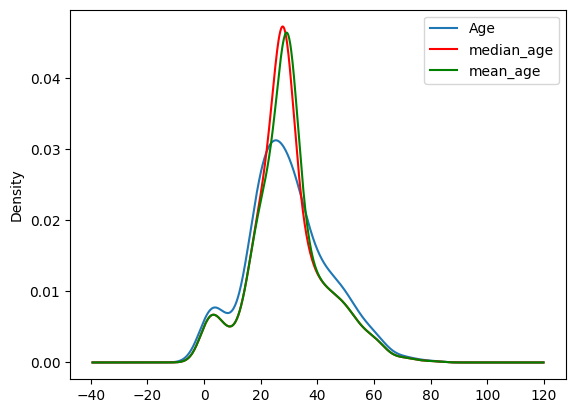

'these are the drastic changes aise nhi hona chahiye result axa nhi ayega'

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

"""these are the drastic changes aise nhi hona chahiye result axa nhi ayega"""

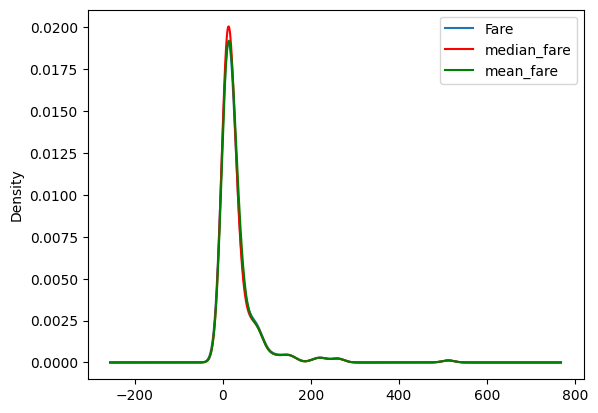

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best');

In [47]:
X_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
mean_age,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
median_age,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
mean_fare,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
median_fare,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [48]:
X_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
mean_age,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
median_age,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
mean_fare,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
median_fare,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


'Red flag beacuase outliers comes in the data'

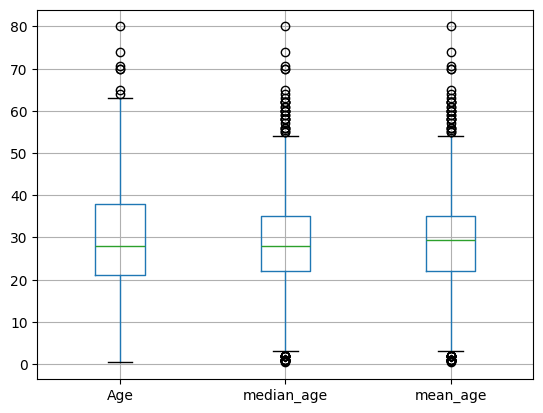

In [50]:
X_train[['Age','median_age','mean_age']].boxplot()
"Red flag beacuase outliers comes in the data"

<Axes: >

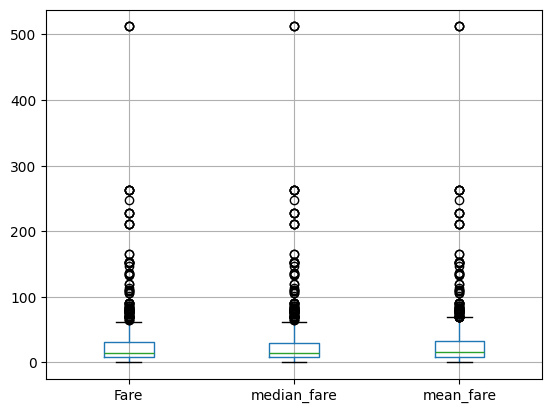

In [52]:
X_train[['Fare','median_fare','mean_fare']].boxplot()


# using scikitlearn

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [57]:
trf=ColumnTransformer(transformers=[
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [58]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [62]:
trf.named_transformers_['imputer1'].statistics_,trf.named_transformers_['imputer2'].statistics_

(array([28.]), array([32.51778772]))

In [63]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

# arbitrary Value Imputations
use when data is not missing randomly not used much

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [66]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  210.2517072477435
Age Variance after 99 wala imputation:  932.9665366701432
Age Variance after -1 wala imputation:  315.9955036260055
Original Fare variable variance:  2761.0314349486343
Fare Variance after 999 wala imputation:  47525.470595360035
Fare Variance after -1 wala imputation:  2675.2394049177024


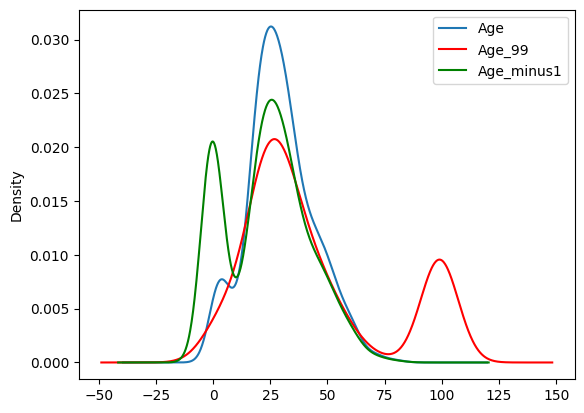

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

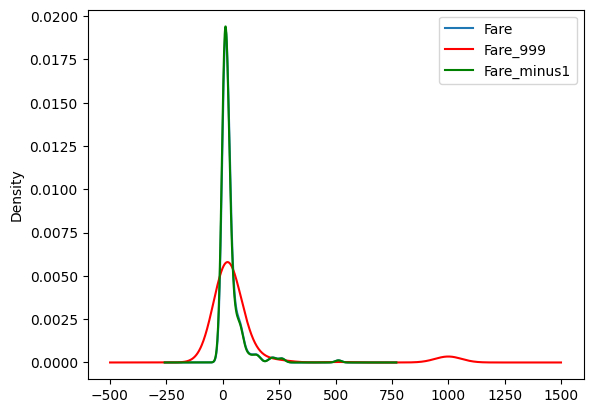

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [69]:
X_train.cov(),X_train.corr()

(                    Age         Fare     Family      Age_99  Age_minus1  \
 Age          210.251707    75.481375  -6.993325  210.251707  210.251707   
 Fare          75.481375  2761.031435  18.599163 -111.965046  135.785804   
 Family        -6.993325    18.599163   2.830892   -6.941982   -5.034556   
 Age_99       210.251707  -111.965046  -6.941982  932.966537 -166.460682   
 Age_minus1   210.251707   135.785804  -5.034556 -166.460682  315.995504   
 Fare_999     130.495777  2761.031435  16.878492 -255.051165  262.712284   
 Fare_minus1   69.137162  2761.031435  17.684447 -101.137070  124.270305   
 
                  Fare_999  Fare_minus1  
 Age            130.495777    69.137162  
 Fare          2761.031435  2761.031435  
 Family          16.878492    17.684447  
 Age_99        -255.051165  -101.137070  
 Age_minus1     262.712284   124.270305  
 Fare_999     47525.470595  1063.944817  
 Fare_minus1   1063.944817  2675.239405  ,
                   Age      Fare    Family    Age_99 

# using scikitlearn

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [72]:
trf=ColumnTransformer(transformers=[
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [73]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [74]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)